In [219]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path= '/content/drive/MyDrive/seeds.data'
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length of kernel',
            'Width of kernel',
            'Asymmetry coefficient',
            ' groove.']
df = pd.read_csv(path,header=None,names=features + ['target'])
display(df)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,groove.,target
0,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
1,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
3,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
...,...,...,...,...,...,...,...,...
206,12.19,13.2,0.8783,5.137,2.981,3.631,4.87,3
207,11.23,12.88,0.8511,5.14,2.795,4.325,5.003,3
208,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,3
209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [252]:
X = df.iloc[1:,0:7].values
X=X.astype('float64')
y = df.loc[1:,'target']
y=y.astype('int64')
print('Class labels:', np.unique(y))

Class labels: [1 2 3]


In [253]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(168, 7) (42, 7) (168,) (42,)


In [256]:
print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [54 54 60]
Labels counts in y_test: [16 16 10]


In [257]:
X_train = (X_train - np.mean(X_train))/np.std(X_train)
X_test = (X_test - np.mean(X_test))/np.std(X_test)

In [258]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [259]:
"""
design the architecture of a model
"""
model = Sequential()
model.add(Dense(32, input_dim=7,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(4,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# print model summary
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_106 (Dense)           (None, 32)                256       
                                                                 
 dense_107 (Dense)           (None, 16)                528       
                                                                 
 dropout_43 (Dropout)        (None, 16)                0         
                                                                 
 dense_108 (Dense)           (None, 8)                 136       
                                                                 
 dense_109 (Dense)           (None, 4)                 36        
                                                                 
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________


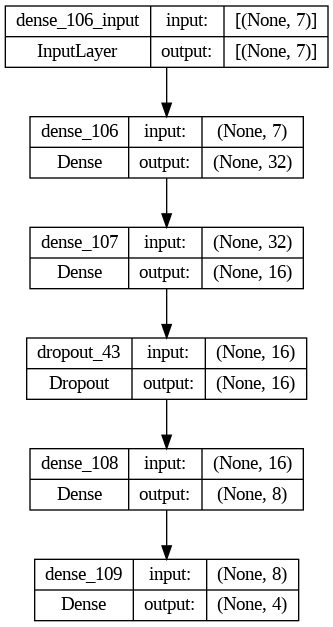

In [260]:
plot_model(model,show_shapes= True, show_layer_names= True)

In [261]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [262]:
history= model.fit(X_train, y_train,epochs=50,batch_size=4,verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
42/42 [==============================] - 1s 8ms/step - loss: 1.3382 - accuracy: 0.4821 - val_loss: 1.2896 - val_accuracy: 0.5476
Epoch 2/50
42/42 [==============================] - 0s 4ms/step - loss: 1.2045 - accuracy: 0.5774 - val_loss: 1.1493 - val_accuracy: 0.5714
Epoch 3/50
42/42 [==============================] - 0s 4ms/step - loss: 1.0698 - accuracy: 0.5655 - val_loss: 1.0029 - val_accuracy: 0.5952
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 0.9374 - accuracy: 0.7024 - val_loss: 0.8914 - val_accuracy: 0.5714
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.8017 - accuracy: 0.7202 - val_loss: 0.7532 - val_accuracy: 0.8095
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 0.7520 - accuracy: 0.7083 - val_loss: 0.6679 - val_accuracy: 0.7381
Epoch 7/50
42/42 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.7381 - val_loss: 0.5765 - val_accuracy: 0.8333
Epoch 8/50
42/42 [==

In [263]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {:.4f} Test Acc.: {:.4f}'.format(*score))

Test loss: 0.1935 Test Acc.: 0.9048


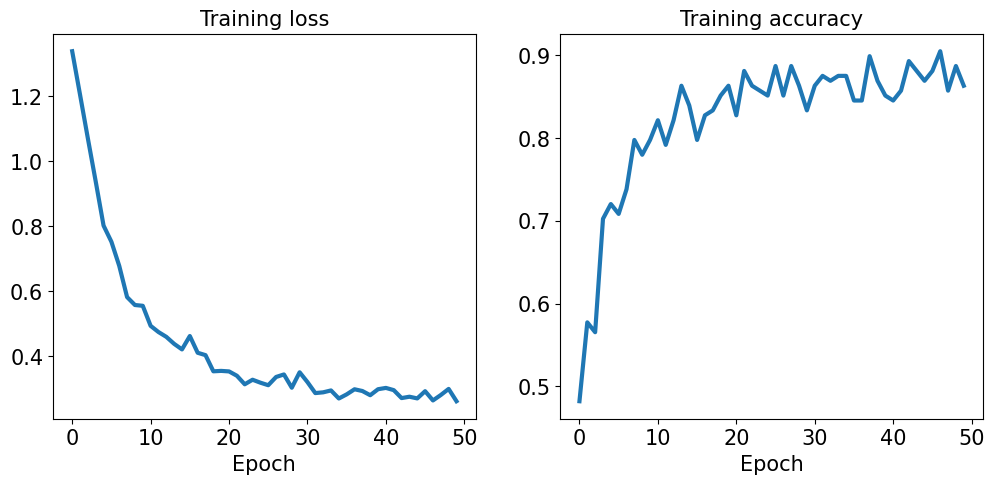

In [264]:
hist = history.history
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [239]:
## MLP model with 4 Fully connected layer (Dense layer) fits the dataset with 90.48% accuracy, 
## which is greater than logistic regression model (86%) that was done in previous assignments.